In [1]:
import argparse
import json
import os
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pathlib import Path
from sklearn.metrics import log_loss, roc_auc_score, roc_curve

total = 0
correct = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [6]:
FAKE_thres = 0.5
REAL_thres = 0.5

l2_y = []
l2_y_pred = []

b7_y = []
b7_y_pred = []

resnest200_y = []
resnest200_y_pred = []

resnest269_y = []
resnest269_y_pred = []

v2_y = []
v2_y_pred = []

deit_y = []
deit_y_pred = []

with open("output.json") as json_file:
    json_data = json.load(json_file)
    for csv_path in glob(os.path.join("result/L2_fake", "*.csv")):
        dir = Path(csv_path).parent
        with open(csv_path, "r") as f:
            rdr = csv.reader(f)
            next(rdr)
            for line in rdr:
                total += 1 
                json_object = json_data[line[0]]
                if json_object['label'] == 'FAKE':
                    l2_y.append(1)
                    l2_y_pred.append(float(line[1]))
                elif json_object['label'] == 'REAL':
                    l2_y.append(0)
                    l2_y_pred.append(float(line[1]))
                    
    for csv_path in glob(os.path.join("result/result_B7_600/2", "*.csv")):
        dir = Path(csv_path).parent
        with open(csv_path, "r") as f:
            rdr = csv.reader(f)
            next(rdr)
            for line in rdr:
                total += 1 
                json_object = json_data[line[0]]
                if json_object['label'] == 'FAKE':
                    b7_y.append(1)
                    b7_y_pred.append(float(line[1]))
                elif json_object['label'] == 'REAL':
                    b7_y.append(0)
                    b7_y_pred.append(float(line[1]))
                    
    for csv_path in glob(os.path.join("result/resnest269rec", "*.csv")):
        dir = Path(csv_path).parent
        with open(csv_path, "r") as f:
            rdr = csv.reader(f)
            next(rdr)
            for line in rdr:
                total += 1 
                json_object = json_data[line[0]]
                if json_object['label'] == 'FAKE':
                    resnest269_y.append(1)
                    resnest269_y_pred.append(float(line[1]))
                elif json_object['label'] == 'REAL':
                    resnest269_y.append(0)
                    resnest269_y_pred.append(float(line[1]))
                    
    for csv_path in glob(os.path.join("result/result_200rec", "*.csv")):
        dir = Path(csv_path).parent
        with open(csv_path, "r") as f:
            rdr = csv.reader(f)
            next(rdr)
            for line in rdr:
                total += 1 
                json_object = json_data[line[0]]
                if json_object['label'] == 'FAKE':
                    resnest200_y.append(1)
                    resnest200_y_pred.append(float(line[1]))
                elif json_object['label'] == 'REAL':
                    resnest200_y.append(0)
                    resnest200_y_pred.append(float(line[1]))

    for csv_path in glob(os.path.join("new_result/fix_effv2m_in21ft1k", "*.csv")):
        dir = Path(csv_path).parent
        with open(csv_path, "r") as f:
            rdr = csv.reader(f)
            next(rdr)
            for line in rdr:
                total += 1 
                json_object = json_data[line[0]]
                if json_object['label'] == 'FAKE':
                    v2_y.append(1)
                    v2_y_pred.append(float(line[1]))
                elif json_object['label'] == 'REAL':
                    v2_y.append(0)
                    v2_y_pred.append(float(line[1]))
                    
                    
    for csv_path in glob(os.path.join("new_result/deitb_384_1", "*.csv")):
        dir = Path(csv_path).parent
        with open(csv_path, "r") as f:
            rdr = csv.reader(f)
            next(rdr)
            for line in rdr:
                total += 1 
                json_object = json_data[line[0]]
                if json_object['label'] == 'FAKE':
                    deit_y.append(1)
                    deit_y_pred.append(float(line[1]))
                elif json_object['label'] == 'REAL':
                    deit_y.append(0)
                    deit_y_pred.append(float(line[1]))

In [7]:
fper1, tper1, thresholds1 = roc_curve(l2_y,l2_y_pred)
fper2, tper2, thresholds2 = roc_curve(b7_y,b7_y_pred)
fper3, tper3, thresholds3 = roc_curve(resnest200_y,resnest200_y_pred)
fper4, tper4, thresholds4 = roc_curve(resnest269_y,resnest269_y_pred)
fper5, tper5, thresholds5 = roc_curve(v2_y,v2_y_pred)
fper6, tper6, thresholds6 = roc_curve(deit_y,deit_y_pred)

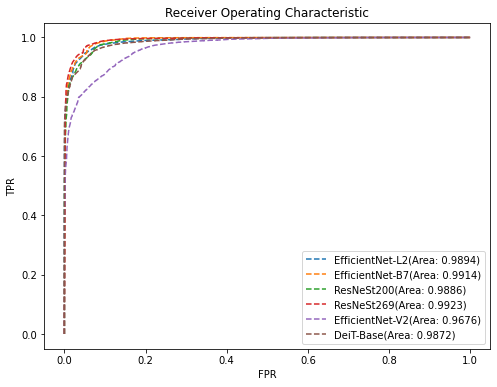

In [36]:
#plt.plot([0,1],[0,1], 'k--')
plt.figure(figsize=(8,6))
plt.plot(fper1, tper1, label= "EfficientNet-L2(Area: 0.9894)",linestyle='--')
plt.plot(fper2, tper2, label= "EfficientNet-B7(Area: 0.9914)",linestyle='--')
plt.plot(fper3, tper3, label= "ResNeSt200(Area: 0.9886)",linestyle='--')
plt.plot(fper4, tper4, label= "ResNeSt269(Area: 0.9923)",linestyle='--')
plt.plot(fper5, tper5, label= "EfficientNet-V2(Area: 0.9676)",linestyle='--')
plt.plot(fper6, tper6, label= "DeiT-Base(Area: 0.9872)",linestyle='--')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.savefig("figure9",dpi=500)
plt.show()